# Neural Networks

* Train a neural network to recognize items of clothing.
* This is limited because it requires the clothing item to be the only thing in the picture, and it has to be centered.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

## Get data
**Fashion MNIST dataset.**: It contains 70,000 items of clothing in 10 different categories. Each item of clothing is in a 28x28 grayscale image.

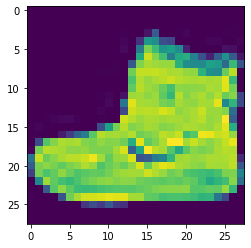

In [ ]:
mnist = tf.keras.datasets.fashion_mnist
(X_trn, y_trn), (X_tst, y_tst) = mnist.load_data()
plt.imshow(X_trn[0])

## Normalize features
* When training a neural network, it's easier to treat all values as between 0 and 1. Scaling the features to a common level, so that **all the features have similar weight and same importance**.

* It is **not necessary that normalization always increases accuracy**. It may or might not. Again it depends on at which stage in your training you apply normalization, on whether you apply normalization after every activation, etc.

* As the range of the values of the features gets narrowed down to a particular range because of normalization, its easy to perform computations over a smaller range of values. So, **usually the model gets trained a bit faster**.

In [ ]:
X_trn = X_trn/255.0
X_tst = X_tst/255.0

## Create Model
* **Sequential**: defines a sequence of layers in the neural network.
* **Flatten**: takes a square matrix and turns it into a 1D vector.
* **Dense**: adds a layer of neurons.
* **Activation function**: tells a layer of neurons what to do.
  * *ReLu*: If X is greater than 0 return X, else return 0. It only passes values of 0 or greater to the next layer in the network.
  * *Softmax*: Takes a set of values, and effectively returns the biggest one. 

### Rules of thumb:
* **The first layer in your network should be the same shape as your data**.
  * Here, the data is 28x28 images, and 28 layers of 28 neurons would be infeasible. So, it makes more sense to flatten that 28x28 into a 784x1.
* **The number of neurons in the last layer should match the number of classes you are classifying for**. 
  * In this case, it's the digits 0 through 9, so there are 10 of them, and hence you should have 10 neurons in your final layer.
* **For far more complex data, extra layers or more neurons are often necessary**.




In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(), # layer 1: flatten the input sq matrix
  tf.keras.layers.Dense(256, activation=tf.nn.relu), # layer 2: 128 neurons
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) # layer 3: 10 output neurons
])

## Compile the Model
* **Loss function** = *Sparse categorical crossentropy*
* **Metrics** = *Accuracy*
* **Optimizer** = *Adam*

In [ ]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'],
    optimizer = 'Adam'
)

## Train the Model

* **Accuracy usually increases with number of epochs** provided that your model doesn't start ***over-fitting***.
* **Callback**: Stop the training when you reach a desired value of accuracy, such as 90% accuracy.

### Overfitting

Overfitting occurs when **the network learns the data from the training set too well**, so it's **specialised to recognize only that data, and as a result is less effective at seeing other data in more general situations***.

In [ ]:
class myCallback90(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callback = myCallback90()

model.fit(X_trn, y_trn, epochs=10, callbacks=[callback])

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6100 - accuracy: 0.7859
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3777 - accuracy: 0.8638
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3317 - accuracy: 0.8782
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3033 - accuracy: 0.8875
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2802 - accuracy: 0.8963
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2696 - accuracy: 0.9001
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2579 - accuracy: 0.9038

Reached 90% accuracy so cancelling training!


## Test the Model

In [ ]:
model.evaluate(X_tst, y_tst)

313/313 [==============================] - 0s 1ms/step - loss: 0.3559 - accuracy: 0.8748


[0.35586607456207275, 0.8748000264167786]

## Make Prediction
* The output of the model is a list of 10 numbers. 
* Those numbers are a probability that the value being classified is the corresponding label.
* They are all very low probabilities except one.
* Because of Softmax, all the probabilities in the list sum to 1.0.

In [ ]:
predictions = model.predict(X_tst)
print("Prediction: ", predictions[0].tolist().index(max(predictions[0])))
print("Label: ", y_tst[0])

Prediction:  9
Label:  9
